In [ ]:
# The objective of this notebook is to:
'''  
01. Load processed clean CSV

02. Show shape

03. Show missing values

04. Show basic statistics

05. Show distributions of key numeric columns

06. Show top categorical values'''

In [1]:
# Imp Imports:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [3]:
# Listing all Clean Processed files:
PROCESSED_PATH = "C://Users//Rachit//OneDrive//Documents//CreditPathAI//data//processed"

files = [f for f in os.listdir(PROCESSED_PATH) if f.endswith("_clean.csv")]
files

['HC_application_train_clean.csv',
 'HC_bureau_balance_clean.csv',
 'HC_bureau_clean.csv',
 'HC_credit_card_balance_clean.csv',
 'HC_installments_payments_clean.csv',
 'HC_POS_CASH_balance_clean.csv',
 'HC_previous_application_clean.csv',
 'HC_sample_submission_clean.csv',
 'HomeCredit_columns_description_clean.csv']

In [11]:
# Loading the data except "application_train":
other_tables = {}

for f in files:
    if f != "HC_application_train_clean.csv":
        df = pd.read_csv(PROCESSED_PATH +'//'+ f)
        other_tables[f] = df

other_tables.keys()


dict_keys(['HC_bureau_balance_clean.csv', 'HC_bureau_clean.csv', 'HC_credit_card_balance_clean.csv', 'HC_installments_payments_clean.csv', 'HC_POS_CASH_balance_clean.csv', 'HC_previous_application_clean.csv', 'HC_sample_submission_clean.csv', 'HomeCredit_columns_description_clean.csv'])

In [12]:
ignore_files = [
    "HC_application_train_clean.csv",
    "HC_sample_submission_clean.csv",
    "HomeCredit_columns_description_clean.csv"
]

other_tables = {}

for f in files:
    if f not in ignore_files:
        df = pd.read_csv(PROCESSED_PATH +'//'+ f)
        other_tables[f] = df

other_tables.keys()


dict_keys(['HC_bureau_balance_clean.csv', 'HC_bureau_clean.csv', 'HC_credit_card_balance_clean.csv', 'HC_installments_payments_clean.csv', 'HC_POS_CASH_balance_clean.csv', 'HC_previous_application_clean.csv'])

In [13]:
shapes = {name: df.shape for name, df in other_tables.items()}
shapes


{'HC_bureau_balance_clean.csv': (27299925, 3),
 'HC_bureau_clean.csv': (1716428, 17),
 'HC_credit_card_balance_clean.csv': (3840312, 23),
 'HC_installments_payments_clean.csv': (13605401, 8),
 'HC_POS_CASH_balance_clean.csv': (10001358, 8),
 'HC_previous_application_clean.csv': (1670214, 37)}

In [14]:
# Missing Value Summary:
missing_report = {}

for name, df in other_tables.items():
    missing_report[name] = df.isnull().sum().sort_values(ascending=False).head(10)

missing_report


{'HC_bureau_balance_clean.csv': sk_id_bureau      0
 months_balance    0
 status            0
 dtype: int64,
 'HC_bureau_clean.csv': amt_annuity               1226791
 amt_credit_max_overdue    1124488
 days_enddate_fact          633653
 amt_credit_sum_limit       591780
 amt_credit_sum_debt        257669
 days_credit_enddate        105553
 amt_credit_sum                 13
 credit_active                   0
 credit_currency                 0
 days_credit                     0
 dtype: int64,
 'HC_credit_card_balance_clean.csv': amt_payment_current           767988
 amt_drawings_atm_current      749816
 cnt_drawings_pos_current      749816
 amt_drawings_other_current    749816
 amt_drawings_pos_current      749816
 cnt_drawings_other_current    749816
 cnt_drawings_atm_current      749816
 cnt_instalment_mature_cum     305236
 amt_inst_min_regularity       305236
 sk_id_prev                         0
 dtype: int64,
 'HC_installments_payments_clean.csv': days_entry_payment        2905
 a

In [15]:
# Quick preview of every table:
for name, df in other_tables.items():
    print(f"\n===== {name} =====")
    display(df.head())



===== HC_bureau_balance_clean.csv =====


,sk_id_bureau,months_balance,status
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C



===== HC_bureau_clean.csv =====


,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN



===== HC_credit_card_balance_clean.csv =====


,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,...,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0



===== HC_installments_payments_clean.csv =====


,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585



===== HC_POS_CASH_balance_clean.csv =====


,sk_id_prev,sk_id_curr,months_balance,cnt_instalment,cnt_instalment_future,name_contract_status,sk_dpd,sk_dpd_def
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0



===== HC_previous_application_clean.csv =====


,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,...,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Descriptive Statistics:
describe_report = {}

for name, df in other_tables.items():
    describe_report[name] = df.describe()


describe_report    

{'HC_bureau_balance_clean.csv':        sk_id_bureau  months_balance
 count  2.729992e+07    2.729992e+07
 mean   6.036297e+06   -3.074169e+01
 std    4.923489e+05    2.386451e+01
 min    5.001709e+06   -9.600000e+01
 25%    5.730933e+06   -4.600000e+01
 50%    6.070821e+06   -2.500000e+01
 75%    6.431951e+06   -1.100000e+01
 max    6.842888e+06    0.000000e+00,
 'HC_bureau_clean.csv':          sk_id_curr  sk_id_bureau   days_credit  credit_day_overdue  \
 count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
 mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
 std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
 min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
 25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
 50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
 75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
 max    4.562550e+05  6.843457e+06  


===== Distribution Plots for HC_bureau_balance_clean.csv =====


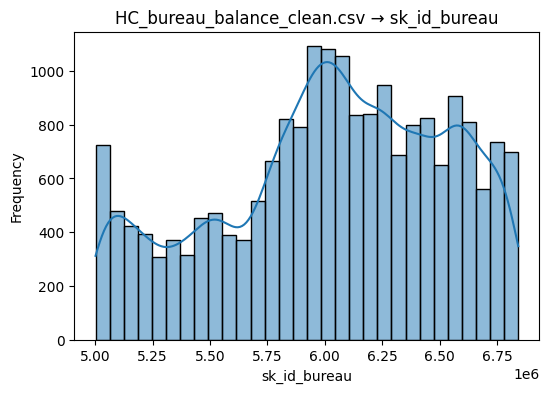

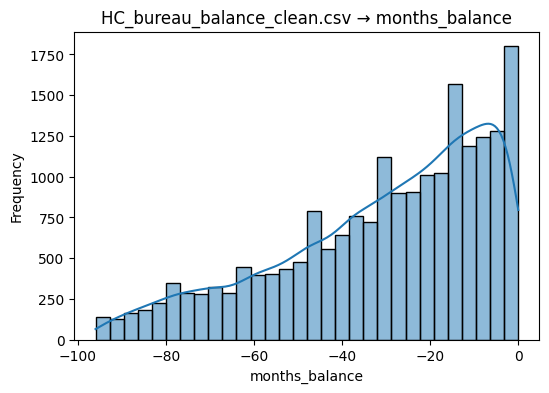


===== Distribution Plots for HC_bureau_clean.csv =====


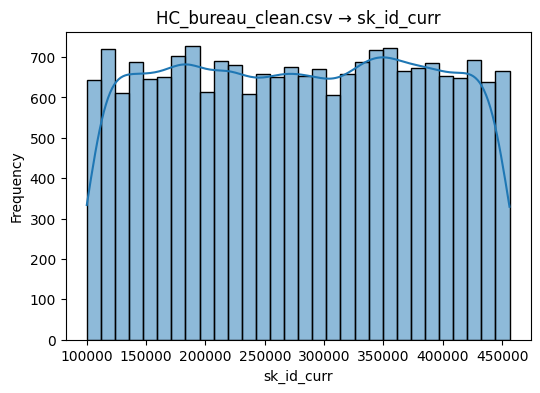

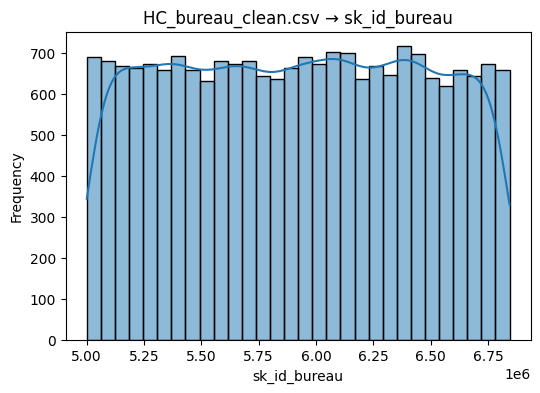

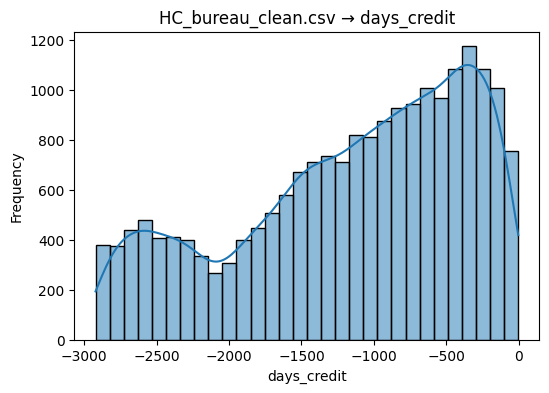


===== Distribution Plots for HC_credit_card_balance_clean.csv =====


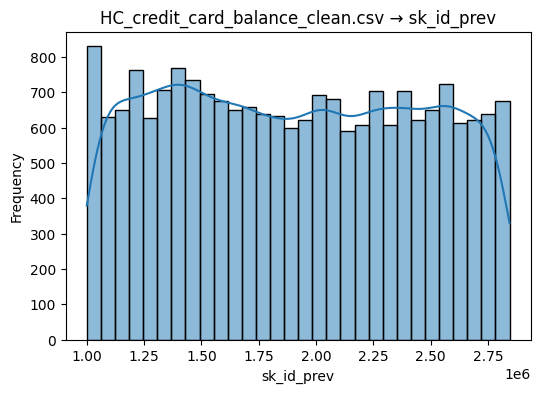

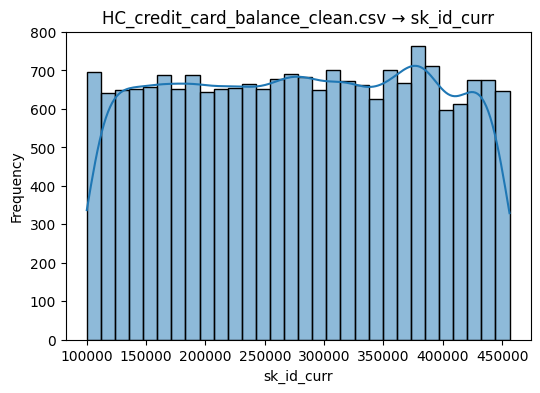

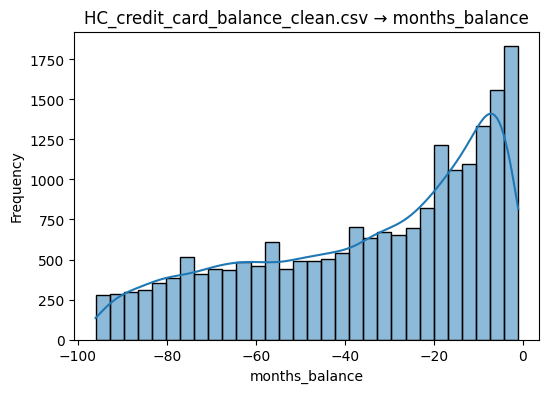


===== Distribution Plots for HC_installments_payments_clean.csv =====


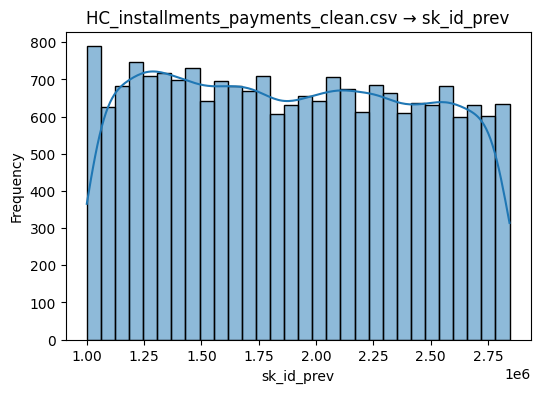

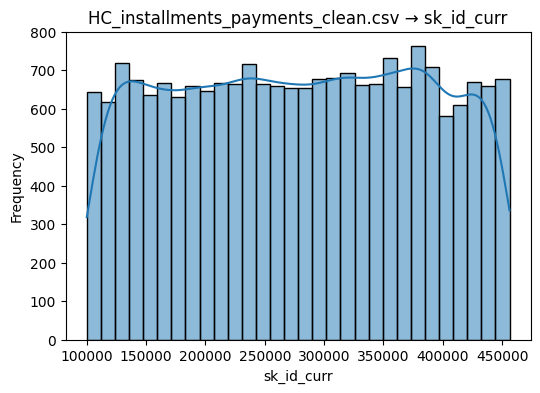

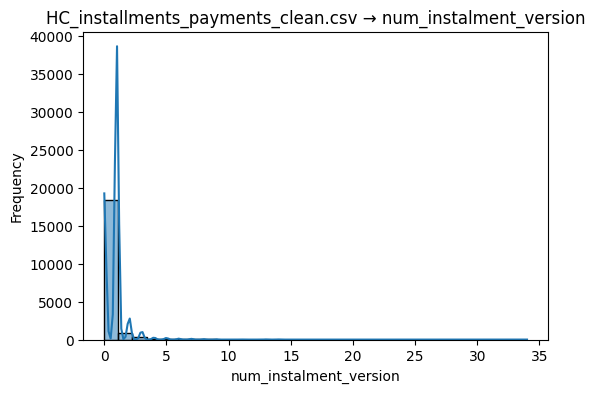


===== Distribution Plots for HC_POS_CASH_balance_clean.csv =====


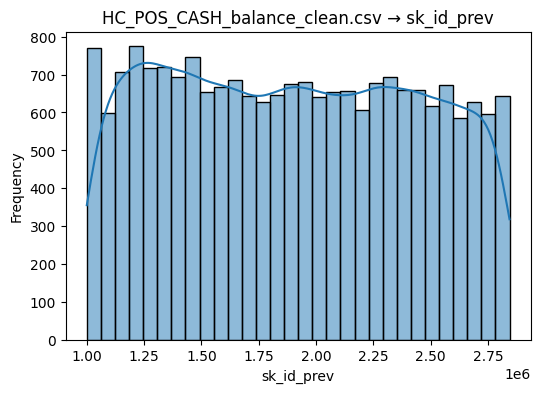

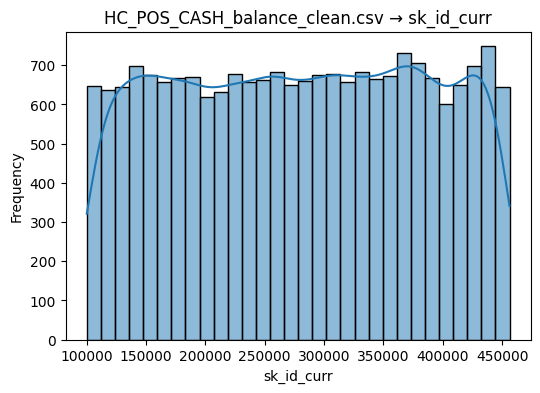

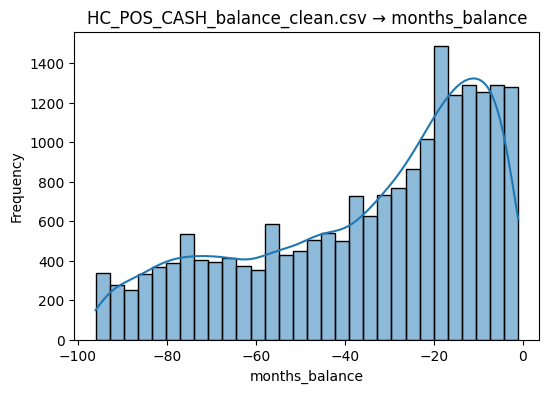


===== Distribution Plots for HC_previous_application_clean.csv =====


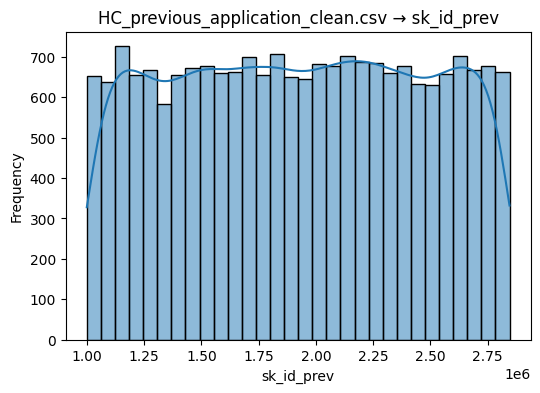

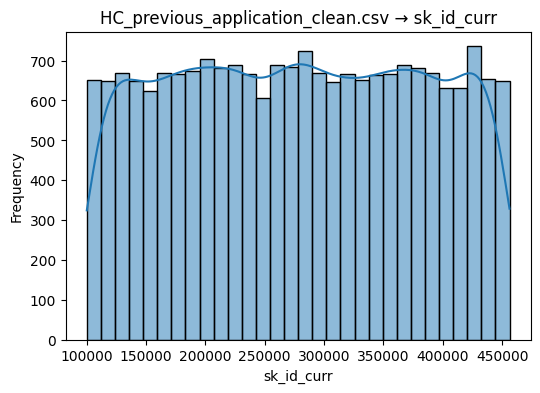

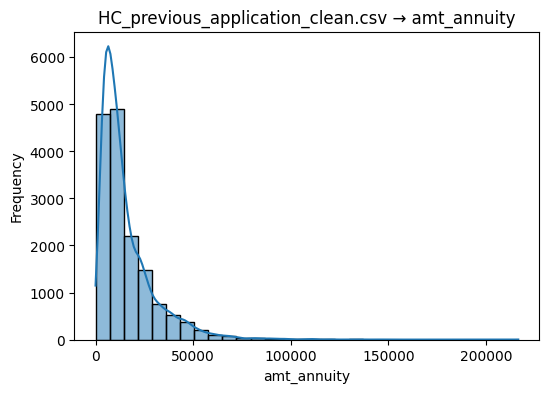

In [ ]:
# Plotting Distribution taking sample(20000 Row's):
for name, df in other_tables.items():
    print(f"\n===== Distribution Plots for {name} =====")
    
    # Select first 3 numeric columns
    num_cols = df.select_dtypes(include=np.number).columns[:3]

    # Sample to prevent memory issues
    if len(df) > 20000:
        df_sample = df.sample(20000, random_state=42)
    else:
        df_sample = df

    # Plot distributions
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df_sample[col], bins=30, kde=True) 
        plt.title(f"{name} → {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

In [21]:
# Top Categories for Categorical Columns:
for name, df in other_tables.items():
    print(f"\n===== Top Categories in {name} =====")

    # selected first 3 non-numeric columns
    cat_cols = df.select_dtypes(exclude=np.number).columns[:3]

    if len(cat_cols) == 0:
        print("No categorical columns.")
        continue


    for col in cat_cols:
        print(f"\nColumn: {col}")
        print(df[col].value_counts().head(10))



===== Top Categories in HC_bureau_balance_clean.csv =====

Column: status
status
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

===== Top Categories in HC_bureau_clean.csv =====

Column: credit_active
credit_active
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

Column: credit_currency
credit_currency
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64

Column: credit_type
credit_type
Consumer credit                           1251615
Credit card                                402195
Car loan                                    27690
Mortgage                                    18391
Microloan                                   12413
Loan for business development                1975
Another type of loan                         1017
Unknown type of loan                          55

In [22]:
# creating Text Summary of EDA outputs:
for name, df in other_tables.items():
    summary = {
        "shape": df.shape,
        "total_missing_values": int(df.isnull().sum().sum()),
        "missing_values_per_column": df.isnull().sum().to_dict(),
        "numeric_columns": list(df.select_dtypes(include=np.number).columns),
        "categorical_columns": list(df.select_dtypes(exclude=np.number).columns)
    }
    
    filename = name.replace(".csv", "_eda_summary.txt")
    out_path = f"../logs/{filename}"
    
    with open(out_path, "w") as f:
        f.write(str(summary))

"EDA Summary Reports Saved to logs/"


'EDA Summary Reports Saved to logs/'